# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

In [8]:
# Get weather data
query_url = url + "&q=Chicago"
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -87.62, 'lat': 41.88}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 29.66, 'pressure': 1016, 'humidity': 81, 'temp_min': 27.5, 'temp_max': 32}, 'visibility': 14484, 'wind': {'speed': 16.11, 'deg': 250}, 'clouds': {'all': 90}, 'dt': 1546465980, 'sys': {'type': 1, 'id': 4861, 'message': 0.0063, 'country': 'US', 'sunrise': 1546435097, 'sunset': 1546468304}, 'id': 4887398, 'name': 'Chicago', 'cod': 200}.


## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=jamestown
Processing Record 2 | Victoria Point
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=victoria point
Processing Record 3 | Rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=rikitea
City not found. Skipping...
Processing Record 4 | Mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=mataura
Processing Record 5 | Rieti
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=rieti
Processing Record 6 | Nanortalik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=nanortalik
Processing Record 7 | Saldanha
http://api.openwea

Processing Record 57 | Pinheiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=pinheiro
Processing Record 58 | Yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=yellowknife
Processing Record 59 | Kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=kahului
Processing Record 60 | Gandorhun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=gandorhun
Processing Record 61 | Muborak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=muborak
Processing Record 62 | Taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=taoudenni
City not found. Skipping...
Processing Record 63 | Beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5

Processing Record 112 | Riyadh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=riyadh
Processing Record 113 | Georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=georgetown
Processing Record 114 | Bakel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=bakel
Processing Record 115 | Sao Filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=sao filipe
Processing Record 116 | Talnakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=talnakh
Processing Record 117 | Cascais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=cascais
Processing Record 118 | Belaya Gora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf

Processing Record 168 | Novosergiyevka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=novosergiyevka
Processing Record 169 | Touros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=touros
Processing Record 170 | Severnoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=severnoye
City not found. Skipping...
Processing Record 171 | Itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=itarema
Processing Record 172 | Skibotn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=skibotn
Processing Record 173 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=victoria
Processing Record 174 | Guerrero Negro
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record 224 | Sao Felix do Xingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=sao felix do xingu
Processing Record 225 | Mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=mangan
Processing Record 226 | Yulara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=yulara
Processing Record 227 | Arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=arlit
Processing Record 228 | Osa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=osa
Processing Record 229 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=carnarvon
City not found. Skipping...
Processing Record 230 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing Record 280 | Pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=pangkalanbuun
Processing Record 281 | Boca do Acre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=boca do acre
Processing Record 282 | Toktogul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=toktogul
Processing Record 283 | Larsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=larsnes
Processing Record 284 | Morro Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=morro bay
Processing Record 285 | Roslyakovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=roslyakovo
Processing Record 286 | Port Augusta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d

Processing Record 335 | Uruzgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=uruzgan
Processing Record 336 | Mount Gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=mount gambier
Processing Record 337 | Tingi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=tingi
Processing Record 338 | Agirish
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=agirish
Processing Record 339 | Presidencia Roque Saenz Pena
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=presidencia roque saenz pena
Processing Record 340 | Bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=bubaque
Processing Record 341 | Anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial

Processing Record 390 | Kemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=kemi
Processing Record 391 | Wajid
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=wajid
Processing Record 392 | Follonica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=follonica
Processing Record 393 | Mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=mao
Processing Record 394 | Tadine
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=tadine
Processing Record 395 | Canmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=canmore
Processing Record 396 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=gat
Processing Record 397 |

Processing Record 446 | Chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=chernyshevskiy
City not found. Skipping...
Processing Record 447 | Yen Bai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=yen bai
Processing Record 448 | Odessa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=odessa
Processing Record 449 | Tocopilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=tocopilla
Processing Record 450 | Chama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=chama
Processing Record 451 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=port hardy
Processing Record 452 | Durango
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

City not found. Skipping...
City not found. Skipping...
Processing Record 502 | Sovetskaya Gavan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=sovetskaya gavan
Processing Record 503 | Estacion Coahuila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=estacion coahuila
City not found. Skipping...
Processing Record 504 | Minggang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=minggang
City not found. Skipping...
Processing Record 505 | West Bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=west bay
Processing Record 506 | Andros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=andros
Processing Record 507 | Iquitos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&

Processing Record 557 | Simand
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=simand
Processing Record 558 | Whitehorse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=whitehorse
Processing Record 559 | Taga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=taga
Processing Record 560 | King City
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a1d5d9b18d21b7bdc6964884515d9faf&q=king city


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          560
Cloudiness    560
Country       560
Date          560
Humidity      560
Lat           560
Lng           560
Max Temp      560
Wind Speed    560
dtype: int64

In [13]:
# Save data frame to CSV
weather_data.to_csv('weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,0,AU,1546467073,68,-33.21,138.60,67.84,5.84
1,Victoria Point,75,AU,1546464600,78,-27.58,153.30,75.20,8.05
2,Rikitea,88,PF,1546467261,100,-23.12,-134.97,75.17,14.18
3,Mataura,92,NZ,1546467263,51,-46.19,168.86,63.70,24.07
4,Rieti,0,IT,1546462500,85,42.40,12.86,17.60,46.08


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

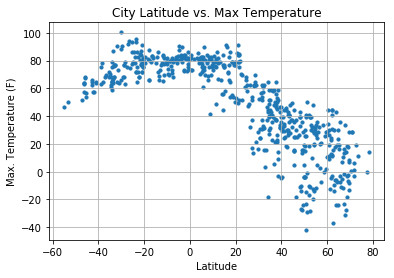

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

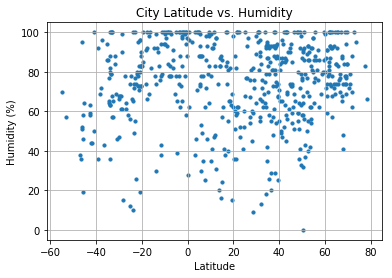

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

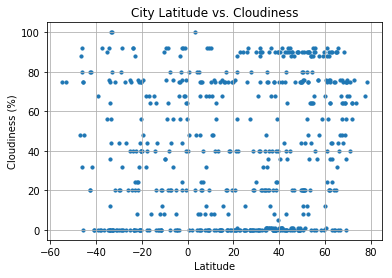

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

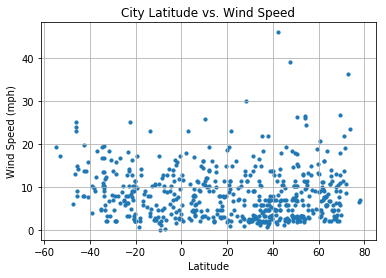

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()